# Working with Chest x rays to identify Pneumonia

For this exercice we will be working with a dataset uploaded from Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

Let's explore the data.

In [4]:
#Basic uploads
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread #to read image from

import seaborn as sns
import os
%matplotlib inline


## Exploring the Data

Original Data source:
Dataset containg three folders ['test', 'train', 'val']. Each folder contains 2 folders ['PNEUMONIA', 'NORMAL']. 

Number of Train samples : (3875, Pneumonia)(1341, Normla) - 5216

Number of Test samples: (390, Pneumonia)(234, Normla) - 624

Number of val samples: (8, Pneumonia)(8, Normla) - 16

In [71]:
path_to_data = '/Users/flatironschool/Documents/flatiron/Mod_4_Andres_Mendel/Data/chest_xray'

In [72]:
# chequin what is inside the chest_xray directory
os.listdir(path_to_data)

['.DS_Store', 'test', 'train', 'val']

In [73]:
os.listdir(path_to_data+'/test')

['PNEUMONIA', 'NORMAL']

In [74]:
#Number of xrays with pneumonia in the test 
len(os.listdir(path_to_data+'/train/PNEUMONIA'))
#os.listdir(path_to_data+'/train/PNEUMONIA')

3876

In [75]:
#Number of normal xrays
len(os.listdir(path_to_data+'/train/NORMAL'))

1341

### Visualizing the data


In [76]:
#Getting the first normal/sick xray
normal_img_path = path_to_data+'/train/NORMAL'
os.listdir(normal_img_path)[0]
sick_img_path = path_to_data+'/train/PNEUMONIA'
os.listdir(sick_img_path)[0]

'person63_bacteria_306.jpeg'

In [7]:
norm_img = imread(normal_img_path+'/NORMAL2-IM-0927-0001.jpeg')
sick_img = imread(sick_img_path+'/person63_bacteria_306.jpeg')

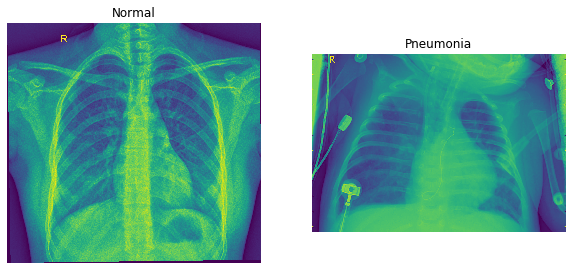

In [63]:
def pic_side_by_side(pic1, pic2, title1, title2):
    """
    Takes two pictures and two titles for them and outputs two pictures side by side
    """
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(pic1)
    ax1.set_title(title1)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(pic2)
    ax2.set_title(title2)
    plt.axis('off');
    
pic_side_by_side(norm_img,sick_img,'Normal','Pneumonia')    

### Geting a sence of the diference in images sizes

In [10]:
norm_img.shape

(2234, 2359)

In [11]:
sick_img.shape

(736, 1048)

In [12]:
sick_img_path

'/Users/flatironschool/Documents/flatiron/Mod_4_Andres_Mendel/Data/chest_xray/train/PNEUMONIA'

In [13]:
dim = []
for image_filename in os.listdir(sick_img_path):
    
    img = imread(sick_img_path+'/'+image_filename)
    dim.append(img.shape)

In [14]:
#dim

In [15]:
x_dim =[]
y_dim =[]
for img_tuple in dim:
    x_dim.append(img_tuple[0])
    y_dim.append(img_tuple[1])


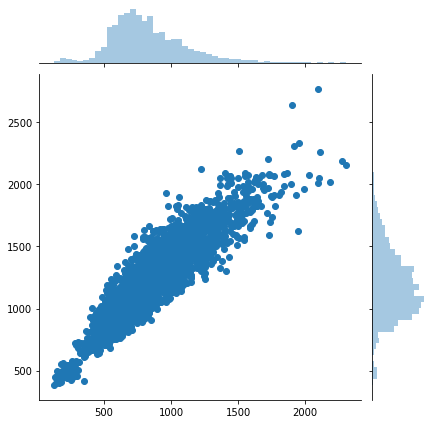

In [16]:
sns.jointplot(x_dim, y_dim);

In [67]:
#mean value for image size
np.mean(x_dim),np.mean(y_dim)

(825.0268387096775, 1200.4836129032258)

In [81]:
image_shape = (800,1200)

### From RGB to Grayscale

From the exploration above image 14 is RGB type

In [8]:
os.listdir(sick_img_path)[14]

'person69_bacteria_338.jpeg'

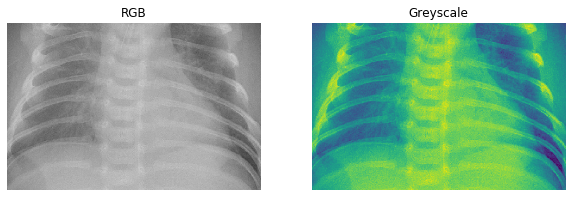

In [9]:
def rgb2gray(rgb):
    """
    Transforms RGB to Grayscale (x,y,colors) -> (x,y)
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = imread(sick_img_path+'/person69_bacteria_338.jpeg')     
grey = rgb2gray(img)    


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.set_title('RGB')
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(grey)
ax2.set_title('Greyscale')
plt.axis('off');

## Dataset preprocessing
Keras dataset preprocessing utilities, located at `tf.keras.preprocessing`, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.

The data folder that looks like this:

`
Data/
   NORMAL/
      a_image_1.jpg
      a_image_2.jpg
   PNEUMONIA/
      b_image_1.jpg
      b_image_2.jpg
`      

### ImageDataGenerator
Generate batches of tensor image data with real-time data augmentation.

The data will be looped over (in batches).

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [69]:
#exploring load_function
img2 = load_img(sick_img_path+'/'+ os.listdir(sick_img_path)[0],
                                      color_mode="grayscale", 
                                      target_size=(256,256), interpolation="nearest")
type(img2)

img3 = load_img(normal_img_path+'/' +os.listdir(normal_img_path)[650],
                                      color_mode="grayscale", 
                                      target_size=(256,256), interpolation="nearest")

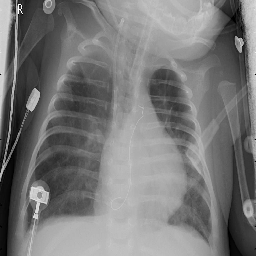

In [70]:
img2

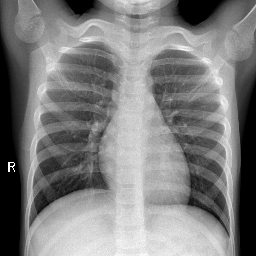

In [16]:
img3

In [53]:
#explorting img_to_array
img2 = img_to_array(img2)
img2.shape

(560, 850, 1)

In [54]:
help(load_img)

Help on function load_img in module tensorflow.python.keras.preprocessing.image:

load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest')
    Loads an image into PIL format.
    
    Usage:
    
    ```
    image = tf.keras.preprocessing.image.load_img(image_path)
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    ```
    
    Arguments:
        path: Path to image file.
        grayscale: DEPRECATED use `color_mode="grayscale"`.
        color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb".
            The desired image format.
        target_size: Either `None` (default to original size)
            or tuple of ints `(img_height, img_width)`.
        interpolation: Interpolation method used to resample the image if the
            target size is different from that of the loaded image.
            Supported me

In [72]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

image_gen2 = ImageDataGenerator()

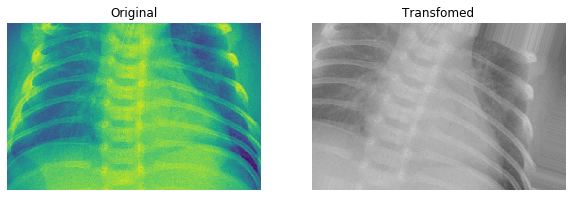

In [37]:
grey_new = image_gen.random_transform(img)


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(grey)
ax1.set_title('Original')
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(grey_new)
ax2.set_title('Transfomed')
plt.axis('off');

In [70]:
#
image_gen.flow_from_directory(path_to_data+'/train')

Found 5216 images belonging to 2 classes.


In [71]:
image_gen.flow_from_directory(path_to_data+'/test')

Found 624 images belonging to 2 classes.


# Model

In [73]:
#Training the model
train_img = image_gen2.flow_from_directory(path_to_data+'/train',
                                           color_mode='grayscale',
                                           target_size=image_shape,
                                           batch_size=20,
                                           class_mode='binary')

test_img = image_gen2.flow_from_directory(path_to_data+'/test',
                                           color_mode='grayscale',
                                           target_size=image_shape,
                                           batch_size=20,
                                           class_mode='binary')
                                      

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [74]:
test_img.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## Model architecture

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [84]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=28, kernel_size=(3,3), strides=2, input_shape=(256,256,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=(256,256,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=2, input_shape=(256,256,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=(256,256,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())


cnn_model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [1]:
batch_size = 256
target_shape = (227,227)


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        path_to_data+'/train',  # this is the target directory
        target_size=target_shape,  # all images will be resized to 227x227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        path_to_data+'/test',
        target_size=target_shape,
        batch_size=batch_size,
        class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined